<h1 style="text-align:center;font-size:30px;" > COVID-19 DETECTION USING CONCURRENT NEURAL NETWORK OPTIMIZED WITH COATI OPTIMIZER ALGORITHM </h1>

# 1 OVERVIEW OF THE PROBLEM

## 1.1 Introduction

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has posed significant challenges to global health systems. Early and accurate detection of COVID-19 is crucial for effective patient management and controlling the spread of the virus. Traditional diagnostic methods, such as Reverse Transcription Polymerase Chain Reaction (RT-PCR), are time-consuming and require specialized laboratories. Therefore, there is a growing need for rapid, accurate, and scalable diagnostic tools.
<ul>
    <li> Early Diagnosis and Treatment </li> 
        Timely Intervention: Early detection of COVID-19 enables prompt medical intervention, which can significantly improve patient outcomes and reduce the severity of the disease. </li>
        Preventing Complications: Identifying the virus early can help in preventing complications, especially in high-risk individuals such as the elderly and those with pre-existing conditions. </li>
    <li> Containing the Spread </li>
            Isolation and Quarantine: Detecting COVID-19 cases early allows for the immediate isolation of infected individuals, reducing the likelihood of transmission to others. </li>
            Contact Tracing: Early detection aids in effective contact tracing, identifying and monitoring individuals who have been in close contact with an infected person. </li>
    <li> Reducing Mortality Rates </li>
            Improved Outcomes: Early and accurate detection can lead to better patient management, reducing the mortality rates associated with severe cases of COVID-19.
            Preventing Overwhelm of Healthcare Systems: By controlling the spread and ensuring timely treatment, healthcare systems are less likely to be overwhelmed, which can help in maintaining the quality of care.</li>
    <li> Economic Impact</li>
            Reducing Economic Disruption: Early detection and containment can mitigate the economic impact of the pandemic by reducing the need for prolonged lockdowns and enabling quicker resumption of normal activities.
            Workplace Safety: Regular screening in workplaces can help maintain a healthy workforce, ensuring business continuity and economic stability.</li>
</ul>

## 1.2 Business Problem

Developing a reliable and efficient system for the early detection of COVID-19 using advanced machine learning techniques, specifically Convolutional Neural Networks (CNNs) and the Coati Optimizer Algorithm. This system aims to address several critical needs:
1. Accuracy and Speed in Diagnosis: </li>
    Challenge: Traditional diagnostic methods like RT-PCR are accurate but time-consuming.
    Solution: Implementing a CNN-based system can provide rapid and accurate diagnosis from medical images (e.g., chest X-rays or CT scans).

2. Resource Optimization: </li>
    Challenge: Limited healthcare resources need to be allocated effectively, especially during a pandemic.
    Solution: Early and accurate detection can ensure that resources such as hospital beds, ventilators, and medical staff are used efficiently.

3. Scalability and Accessibility: </li>
    Challenge: Healthcare systems, especially in resource-limited settings, struggle to scale traditional diagnostic methods.
    Solution: A machine learning-based detection system can be scaled to handle large volumes of data and can be deployed in various healthcare settings, including remote and underserved areas.

## 1.3 Machine Learning Problem

1. Feature Extraction and Classification: </li>
    Task: Utilize CNNs to automatically extract relevant features from medical images and classify them as COVID-19 positive or negative.
2. Optimization: </li>
    Task: Apply the Coati Optimizer Algorithm to fine-tune the CNN model parameters for improved accuracy and performance.
3. Handling Limited and Imbalanced Data: </li>
    Task: Address challenges related to limited datasets and class imbalances to prevent model bias and ensure generalizability.
4. Integration and Scalability: </li>
    Task: Develop a system that can be integrated into existing healthcare workflows and scaled to handle large volumes of data.
5. Bias Mitigation: </li>
    Task: Ensure the model is fair and unbiased, providing accurate diagnoses across diverse patient populations.

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import DirectoryIterator
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import keras_tuner as kt
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from typing import Tuple # Type hint

C:\Users\Akoba\AppData\Local\Temp\ipykernel_25420\3801991149.py:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
path = 'C:/Users/Akoba/Desktop/START up/Covid19_research_project/data/raw/xray_images'

In [3]:
train_dir = path + '/LungData/train'
val_dir = path + '/LungData/val'
test_dir = path + '/LungData/test'

In [4]:
image_generator = ImageDataGenerator(
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      samplewise_center=True,
                                      samplewise_std_normalization=True
                                     )

In [5]:
# Create the training data generator
train_generator = image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=8,  # Process 8 images per batch
    shuffle=True,  # Shuffle the order of images
    class_mode='categorical'  # Multiple classes for classification
)

# Create the validation data generator
validation_generator = image_generator.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=1,  # Process 1 image per batch
    shuffle=False,  # Do not shuffle the order of images
    class_mode='categorical'  # Multiple classes for classification
)

# Create the test data generator
test_generator = image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=1,  # Process 1 image per batch
    shuffle=False,  # Do not shuffle the order of images
    class_mode='categorical'  # Multiple classes for classification
)


Found 1381 images belonging to 2 classes.
Found 345 images belonging to 2 classes.
Found 433 images belonging to 2 classes.


In [6]:
def plot_preprocessed_images(train: DirectoryIterator, num_images_per_class: int) -> None:
    """
    Plots preprocessed images from each class in the training set.

    Args:
        train (DirectoryIterator): The training data iterator.
        num_images_per_class (int): Number of preprocessed images to plot from each class.

    Returns:
        None
    """
    # Initialize counters for each class
    normal_count = 0
    covid_count = 0

    # Plot preprocessed images from each class
    fig, axes = plt.subplots(2, num_images_per_class, figsize=(12, 6))

    for images, labels in train:
        for i in range(len(images)):
            # Get the corresponding class label
            class_label = labels[i]

            # Plot the image based on the class label
            if class_label[0] == 1:
                if covid_count < num_images_per_class:
                    axes[0, covid_count].imshow(images[i])
                    axes[0, covid_count].set_title('COVID-19')
                    axes[0, covid_count].axis('off')
                    covid_count += 1
            elif class_label[1] == 1:
                if normal_count < num_images_per_class:
                    axes[1, normal_count].imshow(images[i])
                    axes[1, normal_count].set_title('NORMAL')
                    axes[1, normal_count].axis('off')
                    normal_count += 1

        if normal_count >= num_images_per_class and covid_count >= num_images_per_class:
            break

    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


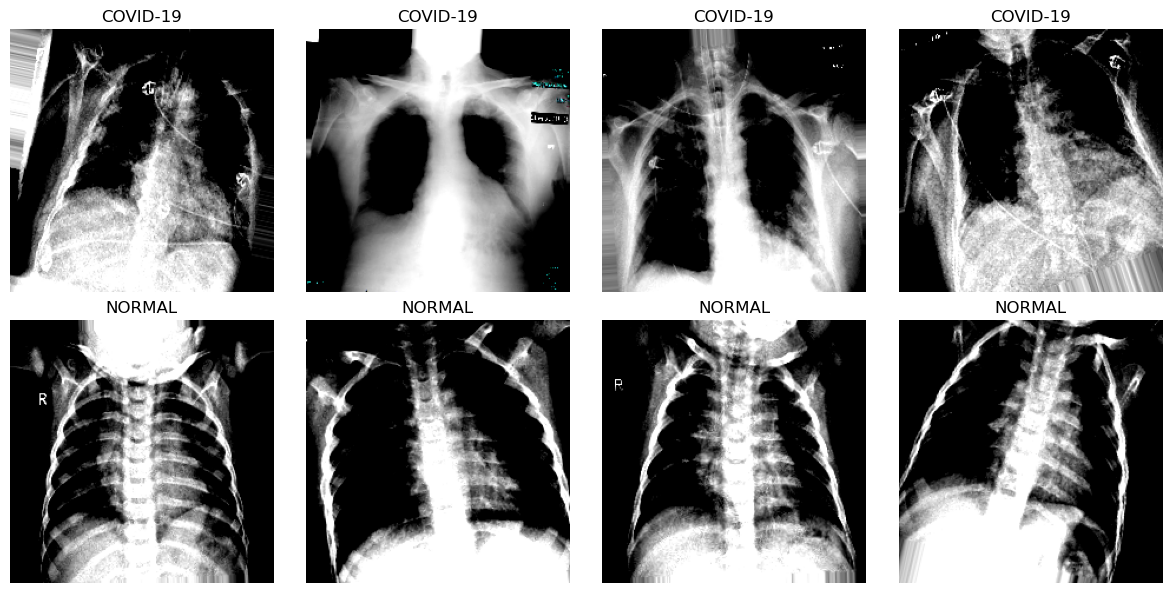

In [7]:
plot_preprocessed_images(train=train_generator, num_images_per_class=4)

In [8]:
def display_image_and_histogram(image, label):
    """
    Display a processed chest X-ray image and its pixel intensity histogram.

    Args:
        image (np.array): The processed chest X-ray image.
        label (str): The label for the image.

    Returns:
        None
    """
    sns.set_style('white')

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # Display the image in the first subplot
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(f"Processed Chest X-Ray Image: {label}")
    axs[0].axis('off')

    # Display the histogram in the second subplot
    sns.histplot(image.ravel(),
                 label=f"Mean: {np.mean(image):.4f}, Std Dev: {np.std(image):.4f}",
                 kde=False, ax=axs[1])
    axs[1].legend(loc='upper center')
    axs[1].set_title('Pixel Intensity Distribution')
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Number of Pixels')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print image details
    print(f"Image dimensions: {image.shape[0]} x {image.shape[1]} pixels, single color channel.")
    print(f"Maximum pixel value: {image.max():.4f}")
    print(f"Minimum pixel value: {image.min():.4f}")
    print(f"Mean pixel value: {image.mean():.4f}")
    print(f"Standard deviation of pixel values: {image.std():.4f}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


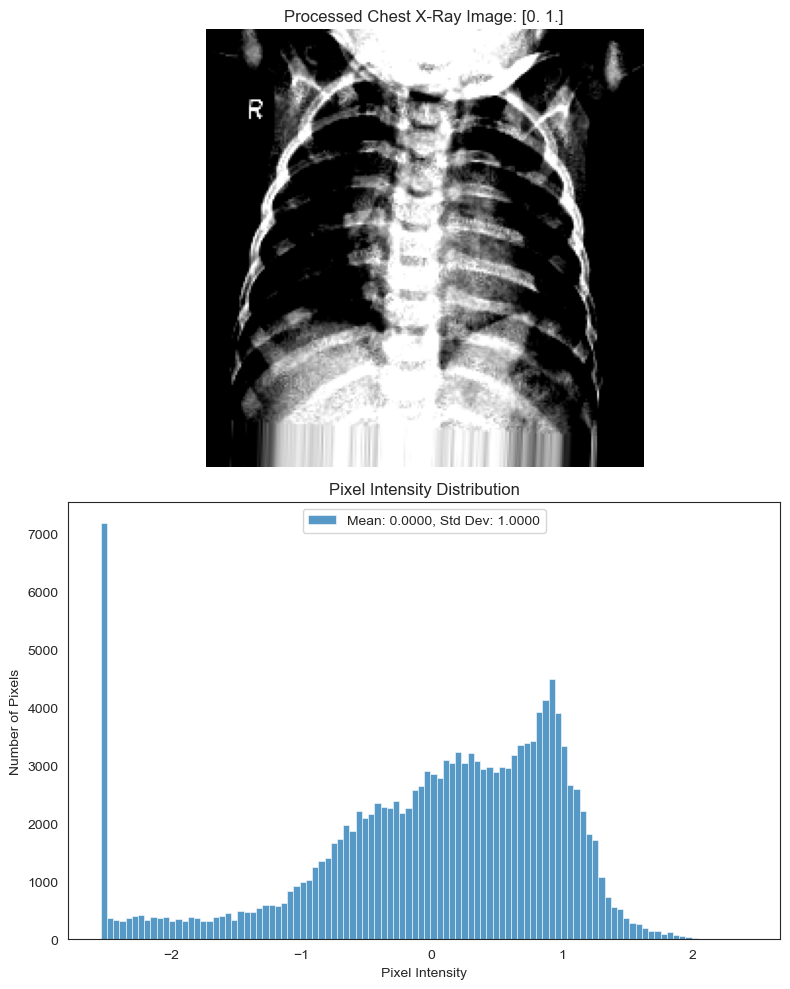

Image dimensions: 224 x 224 pixels, single color channel.
Maximum pixel value: 2.4235
Minimum pixel value: -2.5383
Mean pixel value: 0.0000
Standard deviation of pixel values: 1.0000


In [9]:
generated_image, label = train_generator.__getitem__(0)
image = generated_image[0]
label = label[0]
display_image_and_histogram(image, label)

<h1 style="text-align:center;font-size:30px;" > MODELLING USING CONCURRENT NEURAL NETWORK OPTIMIZED WITH COATI OPTIMIZER ALGORITHM </h1>

In [10]:
path = 'C:/Users/Akoba/Desktop/START up/Covid19_research_project/data/raw/xray_images'
train_dir = os.path.join(path + '/LungData/train')
val_dir = os.path.join(path + '/LungData/val')
test_dir = os.path.join(path + '/LungData/test')

print("Train set:\n____________________")

num_covid19_train = len(os.listdir(os.path.join(train_dir, 'COVID19')))
num_normal_train = len(os.listdir(os.path.join(train_dir, 'NORMAL')))

print(f"COVID19 = {num_covid19_train}")
print(f"NORMAL = {num_normal_train}")

Train set:
____________________
COVID19 = 368
NORMAL = 1013


In [11]:
# Calculate the total number of training samples
total_samples = num_covid19_train + num_normal_train

# Compute class weights to handle class imbalance
class_weight_covid19 = total_samples / (3 * num_covid19_train)
class_weight_normal = total_samples / (3 * num_normal_train)

# Create a dictionary to store the class weights
class_weights = {0: class_weight_covid19, 1: class_weight_normal}

# Print out the calculated class weights
print(f"Weight for COVID-19 class (0): {class_weight_covid19:.2f}")
print(f"Weight for NORMAL class (1): {class_weight_normal:.2f}")

Weight for COVID-19 class (0): 1.25
Weight for NORMAL class (1): 0.45


In [12]:
class_weights

{0: 1.2509057971014492, 1: 0.4544257979598552}

# COATI OPTIMIZER ALGORITHM

In [13]:

class Coati(tf.keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.01, name='Coati', **kwargs):
        """Constructs a new Coati optimizer.

        Args:
            learning_rate: A Tensor or a floating point value. The learning rate.
            name: Optional name prefix for the operations created when applying gradients.
            **kwargs: Keyword arguments. Allowed to be one of "clipnorm" or "clipvalue".
        """
        super(Coati, self).__init__(name, **kwargs)
        self._set_hyper('learning_rate', kwargs.get('lr', learning_rate))  # handle lr=learning_rate
        # Add any other hyperparameters you need here

    def _create_slots(self, var_list):
        # Create slots for additional tensors here
        pass

    def _resource_apply_dense(self, grad, var, apply_state=None):
        # Update 'var' with 'grad' here using your custom optimization algorithm
        lr_t = self._decayed_lr(tf.float32)  # handle learning rate decay
        var.assign_sub(lr_t * grad)

    def _resource_apply_sparse(self, grad, var, indices, apply_state=None):
        # Handle sparse gradient updates here if necessary
        lr_t = self._decayed_lr(tf.float32)  # handle learning rate decay
        var.assign_sub(lr_t * tf.gather(grad, indices))

    def get_config(self):
        base_config = super(Coati, self).get_config()
        return {**base_config, 'learning_rate': self._serialize_hyperparameter('learning_rate')}

In [14]:
def build_model(hp):
    """
    Builds a convolutional neural network model with hyperparameter tuning, including the Coati optimizer.

    Parameters:
    - hp (kerastuner.HyperParameters): HyperParameters object for tuning the model.

    Returns:
    - keras.Sequential: The compiled model.
    """
    model = keras.Sequential()

    # Tune the number of convolutional layers
    for i in range(hp.Int('num_conv_layers', min_value=1, max_value=4)):
        model.add(layers.Conv2D(hp.Int(f'filters_{i}', min_value=32, max_value=256),
                                kernel_size=hp.Choice(f'kernel_size_{i}', values=[3, 5]),
                                activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=hp.Choice(f'pool_size_{i}', values=[2, 3])))

    model.add(layers.Flatten())

    # Tune the number of dense layers
    for i in range(hp.Int('num_dense_layers', min_value=1, max_value=3)):
        model.add(layers.Dense(units=hp.Int(f'num_units_{i}', min_value=64, max_value=512),
                                activation='relu'))
        # Tune the dropout rate
        model.add(layers.Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5)))

    model.add(layers.Dense(2, activation='softmax'))  # 2 classes: COVID19 and NORMAL

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Include Coati optimizer in the hyperparameter choices
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'coati'])

    if hp_optimizer == 'coati':
        optimizer = Coati(learning_rate=hp_learning_rate)
    else:
        optimizer = keras.optimizers.get({
            'class_name': hp_optimizer,
            'config': {'learning_rate': hp_learning_rate}
        })

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [15]:
from keras.callbacks import EarlyStopping

# Set up the random search tuner
tuner = RandomSearch(
    hypermodel=build_model,  # Function that returns a compiled model
    objective='val_accuracy',  # Objective metric to optimize
    max_trials=2,  # Total number of trials to run
    executions_per_trial=1,  # Number of model fits per trial
    directory=os.path.join(path, 'tuner_directory'),  # Path to save logs and models
    project_name='covid-19 classification'  # Tuning session name
)

# Initialize early stopping mechanism
stop_early = EarlyStopping(monitor='val_loss', patience=10)  # Halt training when val_loss stops improving

# Execute the search for optimal hyperparameters
tuner.search(
    x=train_generator,  # Training data generator
    epochs=15,  # Number of epochs to train each model configuration
    validation_data=validation_generator,  # Validation data generator
    callbacks=[stop_early]  # List of callbacks to apply during training
)


Trial 2 Complete [00h 55m 36s]
val_accuracy: 0.9623188376426697

Best val_accuracy So Far: 0.9623188376426697
Total elapsed time: 01h 40m 55s


In [16]:
# Acquire the optimal hyperparameters
optimal_hp = tuner.get_best_hyperparameters()[0]
  # The get_best_hyperparameters() function retrieves a list of top hyperparameter sets.
  # Selecting the first item [0] gives us the set with the best performance.

# Display the optimal hyperparameters 
print("Optimal Hyperparameters:")
print(f"- Convolutional Layers Count: {optimal_hp.get('num_conv_layers')}")
for layer_index in range(optimal_hp.get('num_conv_layers')):
    print(f"  - Conv Layer {layer_index+1} Filters: {optimal_hp.get(f'filters_{layer_index}')}")
    print(f"  - Conv Layer {layer_index+1} Kernel Size: {optimal_hp.get(f'kernel_size_{layer_index}')}")
    print(f"  - Conv Layer {layer_index+1} Pooling Size: {optimal_hp.get(f'pool_size_{layer_index}')}")
print(f"- Dense Layers Count: {optimal_hp.get('num_dense_layers')}")
for layer_index in range(optimal_hp.get('num_dense_layers')):
    print(f"  - Dense Layer {layer_index+1} Units: {optimal_hp.get(f'num_units_{layer_index}')}")
    print(f"  - Dense Layer {layer_index+1} Dropout: {optimal_hp.get(f'dropout_rate_{layer_index}')}")
print(f"- Learning Rate: {optimal_hp.get('learning_rate')}")
# Ensure to include 'Coati' if it's the selected optimizer
optimizer = optimal_hp.get('optimizer')
print(f"- Optimizer: {'Coati' if optimizer == 'Coati' else optimizer}")

Optimal Hyperparameters:
- Convolutional Layers Count: 4
  - Conv Layer 1 Filters: 43
  - Conv Layer 1 Kernel Size: 5
  - Conv Layer 1 Pooling Size: 2
  - Conv Layer 2 Filters: 94
  - Conv Layer 2 Kernel Size: 5
  - Conv Layer 2 Pooling Size: 2
  - Conv Layer 3 Filters: 32
  - Conv Layer 3 Kernel Size: 3
  - Conv Layer 3 Pooling Size: 2
  - Conv Layer 4 Filters: 32
  - Conv Layer 4 Kernel Size: 3
  - Conv Layer 4 Pooling Size: 2
- Dense Layers Count: 1
  - Dense Layer 1 Units: 310
  - Dense Layer 1 Dropout: 0.13147344336623235
- Learning Rate: 0.001
- Optimizer: sgd


### Best Hyperparameter Ecample would look like

In [17]:
def best_model():
    model = keras.Sequential()
    input_shape = (224, 224, 3)
    
    # Convolutional layers
    model.add(layers.Conv2D(156, kernel_size=3, activation='relu', input_shape=(input_shape)))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(149, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(192, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=3))
    model.add(layers.Conv2D(254, kernel_size=5, activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=2))

    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(188, activation='relu'))
    model.add(layers.Dropout(0.4296478261801449))
    model.add(layers.Dense(310, activation='relu'))
    model.add(layers.Dropout(0.20158293434446))
    model.add(layers.Dense(2, activation='softmax'))  # 3 classes: COVID19 andNORMAL

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                  loss='categorical_crossentropy', # categorical_crossentropy loss function porque es Multi-class
                  metrics=['accuracy'])

    return model

# Create the model
best_model = best_model()

C:\Users\Akoba\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# MODEL TRAINING

In [18]:
# Assemble the model using the optimal hyperparameters
model = tuner.hypermodel.build(optimal_hp)

# Initialize early stopping mechanism
stop_early = EarlyStopping(monitor='val_loss', patience=5)  # Halt training when val_loss stops improving

# Commence training of the top-performing model
training_process = model.fit(train_generator, 
                                         epochs=15,
                                         batch_size=32,
                                         validation_data=validation_generator, 
                                         class_weight=class_weights
                                        )

# Persisting the model post-training
model.save(os.path.join(path, 'models', 'model_cnn_coati.h5'))

Epoch 1/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.4210 - loss: 0.4510 - val_accuracy: 0.8609 - val_loss: 0.5704
Epoch 2/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8955 - loss: 0.3091 - val_accuracy: 0.9304 - val_loss: 0.2673
Epoch 3/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9353 - loss: 0.1645 - val_accuracy: 0.9304 - val_loss: 0.2152
Epoch 4/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9345 - loss: 0.1295 - val_accuracy: 0.9565 - val_loss: 0.1693
Epoch 5/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9309 - loss: 0.1216 - val_accuracy: 0.9304 - val_loss: 0.1940
Epoch 6/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9488 - loss: 0.1063 - val_accuracy: 0.9333 - val_loss: 0.1951
Epoch 7/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9448 - loss: 0.1194 - val_accuracy: 0.9623 - val_loss: 0.1489
Epoch 8/15
173/173 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9544 - loss: 0.1120 - val_accu

In [19]:
# save the weights
model.save_weights('C:/Users/Akoba/Desktop/START up/Covid19_research_project/models/cnn/model_weights.weights.h5')

In [20]:
# To save the model once it has been trained 
model.save('C:/Users/Akoba/Desktop/START up/Covid19_research_project/models/cnn/model_covid_classif.h5')

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 220, 220, 43)        │           3,268 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 110, 110, 43)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 106, 106, 94)        │         101,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 53, 53, 94)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 51, 51, 32)          │          27,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 23, 23, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 310)                 │       1,200,630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 310)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │             622 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,342,018 (5.12 MB)

 Trainable params: 1,342,016 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [22]:
# Determine the most suitable number of epochs for model training using the acquired hyperparameters.
validation_accuracy_each_epoch = training_process.history['val_accuracy']
optimal_epoch = validation_accuracy_each_epoch.index(max(validation_accuracy_each_epoch)) + 1
print('Optimal epoch for training: %d' % (optimal_epoch,))

Optimal epoch for training: 7


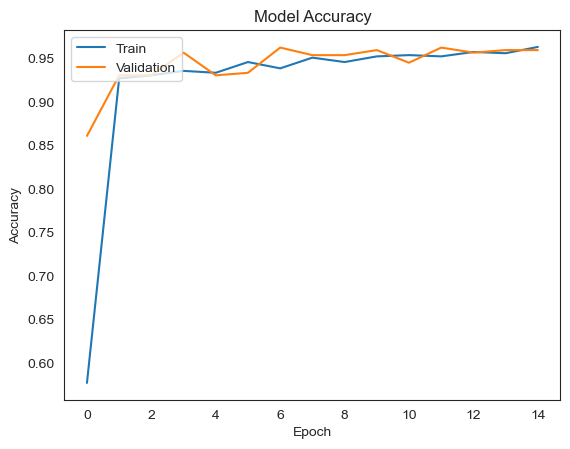

In [23]:
plt.plot(training_process.history['accuracy'])
plt.plot(training_process.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

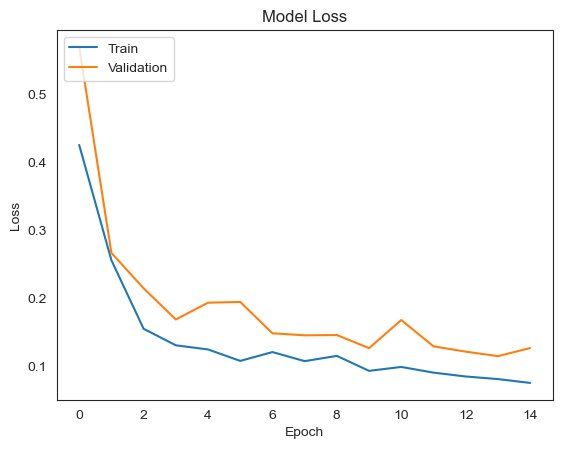

In [24]:
plt.plot(training_process.history['loss'])
plt.plot(training_process.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# Evaluate the best model on the test set
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

433/433 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9581 - loss: 0.1081
Test Accuracy: 97.00%
173/173 ━━━━━━━━━━━━━━━━━━━━ 99s 572ms/step - accuracy: 0.9644 - loss: 0.1181
Train Accuracy: 96.38%


In [26]:
predicted = model.predict(test_generator) # y_score

433/433 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step


In [27]:
predicted # predicted.shape: (****, 2)

array([[9.90550518e-01, 9.44942888e-03],
       [9.97760653e-01, 2.23933114e-03],
       [9.98673439e-01, 1.32657192e-03],
       [9.59078372e-01, 4.09216136e-02],
       [9.96983230e-01, 3.01680923e-03],
       [9.99682784e-01, 3.17182072e-04],
       [2.08920449e-01, 7.91079581e-01],
       [9.99951482e-01, 4.84854427e-05],
       [5.27226746e-01, 4.72773254e-01],
       [9.98707652e-01, 1.29233254e-03],
       [9.99488592e-01, 5.11359714e-04],
       [9.98200297e-01, 1.79971766e-03],
       [9.99836087e-01, 1.63943318e-04],
       [9.98232305e-01, 1.76772394e-03],
       [9.99873161e-01, 1.26766638e-04],
       [9.99161243e-01, 8.38760228e-04],
       [9.45025742e-01, 5.49742803e-02],
       [9.97734547e-01, 2.26541213e-03],
       [9.96588945e-01, 3.41103226e-03],
       [9.99996662e-01, 3.31150954e-06],
       [9.99968410e-01, 3.15453508e-05],
       [9.99996781e-01, 3.16022033e-06],
       [9.98162568e-01, 1.83746335e-03],
       [9.99912858e-01, 8.71780139e-05],
       [9.993051

In [28]:
# 'np.argmax(p)' retrieves the index of the highest value in 'p', which aligns with the class that the model's softmax output deems most probable.
predicted_classes = [np.argmax(probability) for probability in predicted] # holds the predicted classes for each sample in the test set

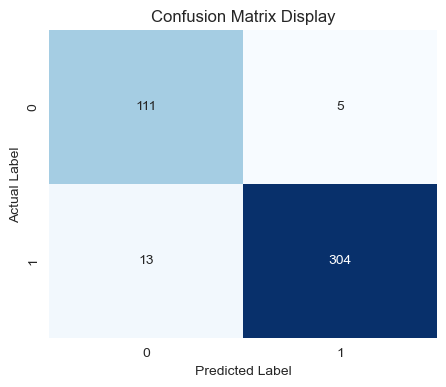

In [29]:
# Retrieve actual class labels
actual_classes = test_generator.classes # Example output: array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# Generate the confusion matrix
conf_matrix = confusion_matrix(actual_classes, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Display')
plt.show()

In [30]:
target_names = ['Class 0: COVID19', 'Class 1: NORMAL']
print(classification_report(actual_classes, predicted_classes, target_names=target_names))

                  precision    recall  f1-score   support

Class 0: COVID19       0.90      0.96      0.93       116
 Class 1: NORMAL       0.98      0.96      0.97       317

        accuracy                           0.96       433
       macro avg       0.94      0.96      0.95       433
    weighted avg       0.96      0.96      0.96       433



In [2]:
# Load the model
new_model = tf.keras.models.load_model('C:/Users/Akoba/Desktop/START up/Covid19_research_project/models/cnn/model_covid_classif.h5')
# Check its architecture
new_model.summary()

NameError: name 'tf' is not defined

In [1]:
# Assuming binary classification and 'predicted_probabilities' is a 2D array with shape (n_samples, n_classes)
# where each column is the probability for each class.
# We take the probabilities for the positive class (usually class 1)
positive_class_probabilities = predicted_probabilities[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(actual_classes, positive_class_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'predicted_probabilities' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Assuming the training history is stored in a variable named 'history'
# Example: history = model.fit(...)

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_process.history['accuracy'], label='Training Accuracy')
plt.plot(training_process.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(training_process.history['loss'], label='Training Loss')
plt.plot(training_process.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
# Create a new figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracy on the first y-axis
ax1.plot(training_process.history['accuracy'], label='Training Accuracy', color='red', linestyle='dashed')
ax1.plot(training_process.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='dashed')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis to plot loss
ax2 = ax1.twinx()
ax2.plot(training_process.history['loss'], label='Training Loss', color='red')
ax2.plot(training_process.history['val_loss'], label='Validation Loss', color='blue')
ax2.set_ylabel('Loss', color='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Training and Validation Accuracy and Loss')
plt.show()
